In [22]:
# Indicium LIgh House- desafio Análise de Dados
## Procederemos a análise de dados, utilizando os arquivos CSV disponibilizados
### Faremos de modo didático e gradual, utilizando o notebook que ficará disponível posteriormente no github
## Buscaremos abordar os dados de modo a responder as perguntas e endereçar os KPIs

In [23]:
### Iniciamos importando as libs necessárias para o desafio
import pandas as pd  # manipulação de dados
import numpy as np  # operações numéricas
import matplotlib.pyplot as plt  # crias algumas visualizações
import seaborn as sns  # gerar gráficos mais complexos
from datetime import datetime  # manipulação de datas


In [24]:
## próximo passo é carregar os dados que serão utilizados, após feito o upload para o jupyter
# Carregamento dos datasets
caminho_dados = "Indicium_light_house/"

# Carregar cada dataset em um DataFrame
df_agencias = pd.read_csv(caminho_dados + "agencias.csv")
df_clientes = pd.read_csv(caminho_dados + "clientes.csv")
df_colab_agencia = pd.read_csv(caminho_dados + "colaborador_agencia.csv")
df_colaboradores = pd.read_csv(caminho_dados + "colaboradores.csv")
df_contas = pd.read_csv(caminho_dados + "contas.csv")
df_propostas = pd.read_csv(caminho_dados + "propostas_credito.csv")
df_transacoes = pd.read_csv(caminho_dados + "transacoes.csv")

In [25]:
# agora precismos realizar a primeir análise dos dados, visual e também quanto a dimensão dos dados
# Verificando as primeiras 15 linhas de cada dataset

print(df_transacoes.head(15))

print(df_propostas.head(15))

print(df_contas.head(15))

print(df_clientes.head(15))

print(df_agencias.head(15))

print(df_colab_agencia.head(15))

print(df_colaboradores.head(15))



    cod_transacao  num_conta                  data_transacao nome_transacao  \
0            3100        256         2020-05-22 03:15:21 UTC          Saque   
1           28405        256         2021-06-29 11:52:38 UTC          Saque   
2            1776        512         2020-05-17 13:04:50 UTC          Saque   
3           14311        512         2020-09-06 02:55:34 UTC          Saque   
4           25012        512         2020-10-16 09:26:52 UTC          Saque   
5           26883        512         2020-11-09 00:47:27 UTC          Saque   
6           35017        512         2021-04-13 08:17:24 UTC          Saque   
7           46264        512         2021-05-01 06:25:50 UTC          Saque   
8           21340        768         2020-02-14 21:42:15 UTC          Saque   
9           64259          1         2019-08-11 15:13:07 UTC          Saque   
10          28202        257         2022-12-26 05:13:37 UTC          Saque   
11          50107        257  2022-12-30 00:00:00.04

In [26]:
### Ficou claro que observar todos os datasets em ambiente python demonstra ser contraproducente
## Melhor criar uma funcao simples que utiliza um dicionario em que as chaves sao categorias e os valores sao os datasets
# Assim fica mais simples e rapido de codar para exibir informações básicas sobre os datasets

print("\nInformações sobre os datasets carregados:")
dfs = {
    "Agências": df_agencias,
    "Clientes": df_clientes,
    "Colaboradores Agência": df_colab_agencia,
    "Colaboradores": df_colaboradores,
    "Contas": df_contas,
    "Propostas Crédito": df_propostas,
    "Transações": df_transacoes,
}
# Exibir as primeiras informacoes descritivas de cada dataset
for nome, df in dfs.items():
    print(f"\n{nome} - Linhas: {df.shape[0]}, Colunas: {df.shape[1]}")
    print(df.head())  # Exibir as primeiras linhas do dataset
    print(f"\nInfo descritivas:")
    print(df.info())
   



Informações sobre os datasets carregados:

Agências - Linhas: 10, Colunas: 7
   cod_agencia              nome  \
0            7   Agência Digital   
1            1    Agência Matriz   
2            2   Agência Tatuapé   
3            3  Agência Campinas   
4            4    Agência Osasco   

                                            endereco     cidade  uf  \
0  Av. Paulista, 1436 - Cerqueira César, São Paul...  São Paulo  SP   
1  Av. Paulista, 1436 - Cerqueira César, São Paul...  São Paulo  SP   
2  Praça Sílvio Romero, 158 - Tatuapé, São Paulo ...  São Paulo  SP   
3  Av. Francisco Glicério, 895 - Vila Lidia, Camp...   Campinas  SP   
4  Av. Antônio Carlos Costa, 1000 - Bela Vista, O...     Osasco  SP   

  data_abertura tipo_agencia  
0    2015-08-01      Digital  
1    2010-01-01       Física  
2    2010-06-14       Física  
3    2012-03-04       Física  
4    2013-11-06       Física  

Info descritivas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data

In [27]:
# Vamos a primeira pergunta: 

## Qual trimestre tem, em média, mais transacoes aprovadas e qual tem, também em média, maior volume movimentado?

### Para responder a essa pergunta, precisamos seguir os seguintes passos:
### Transformar os dados daas colunas de data em formato datetime para melhor manipular
### Criar uma coluna de trimestre na tabela de transações
### Agrupar as transações por trimestre


In [28]:
# Convertendo a coluna de data para o tipo datetime
df_transacoes['data_transacao'] = pd.to_datetime(df_transacoes['data_transacao'])

# Criando a coluna de trimestre
df_transacoes['trimestre'] = df_transacoes['data_transacao'].dt.quarter


In [29]:
# Agrupando as transacoes por trimestre e calculando a média usando o metodo groupby e .agg()
transacoes_por_trimestre = df_transacoes.groupby('trimestre').agg(
    media_transacoes=('cod_transacao', 'count'),
    volume_medio=('valor_transacao', 'sum')
).reset_index()

# Encontrando os trimestres com os maiores valores
trimestre_mais_transacoes = transacoes_por_trimestre.loc[transacoes_por_trimestre['media_transacoes'].idxmax(), 'trimestre']
trimestre_maior_volume = transacoes_por_trimestre.loc[transacoes_por_trimestre['volume_medio'].idxmax(), 'trimestre']

print(f"O trimestre com mais transações em média é o {trimestre_mais_transacoes}º trimestre.")
print(f"O trimestre com maior volume movimentado em média é o {trimestre_maior_volume}º trimestre.")


O trimestre com mais transações em média é o 4º trimestre.
O trimestre com maior volume movimentado em média é o 4º trimestre.


In [30]:
# o quatro trimestre apresenta maior volume e mais transcoes, o que implica nao so que sao realizados mais negocios
# como tambem que os negocios tendem a ser mais substaciais, ou seja, as pessoas precisam de mais dinheiro no final do ano

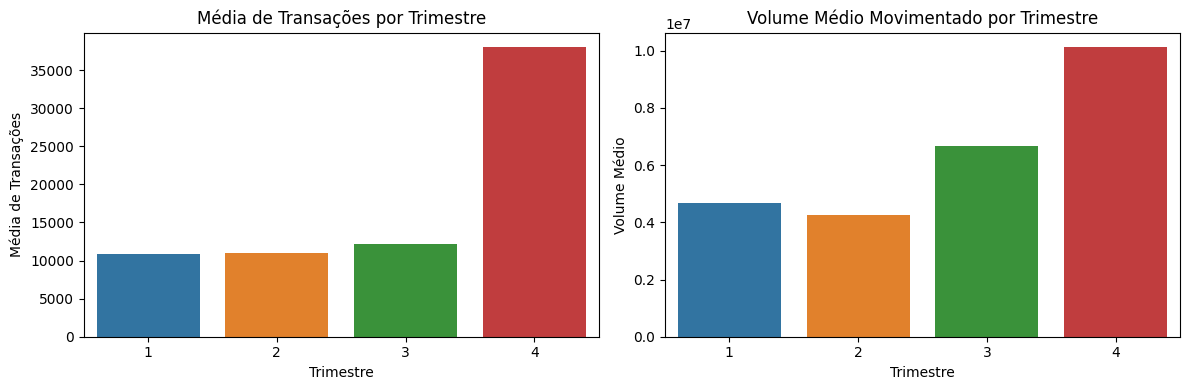

In [31]:
# Visualizando os resultados
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(x='trimestre', y='media_transacoes', data=transacoes_por_trimestre, ax=ax[0])
ax[0].set_title('Média de Transações por Trimestre')
ax[0].set_xlabel('Trimestre')
ax[0].set_ylabel('Média de Transações')

sns.barplot(x='trimestre', y='volume_medio', data=transacoes_por_trimestre, ax=ax[1])
ax[1].set_title('Volume Médio Movimentado por Trimestre')
ax[1].set_xlabel('Trimestre')
ax[1].set_ylabel('Volume Médio')

plt.tight_layout()
plt.show()


In [32]:
# Sabendo que o 4 trimestre tende a ser mais movimentado e volumoso, podemos responder sobre a taxa de aprovacao
# podemos chegar ao seguinte, numero absoluto de propostas que se realizaram em forma de negocio / valor total de propostas
# podemos usar funcao lambda para encontrar os valores de Aprovada e somar estes valores inserindo o resultado em uma variavel
# na tabela de propostas existe o status da proposta que apresenta valores como: em analise, aprovada..
# Contar o total de propostas e aprovações por trimestre

# Converter a coluna de data para o tipo datetime no DataFrame df_propostas
df_propostas['data_entrada_proposta'] = pd.to_datetime(df_propostas['data_entrada_proposta'])

# Criar a coluna de trimestre no DataFrame df_propostas
df_propostas['trimestre'] = df_propostas['data_entrada_proposta'].dt.quarter

# Contar o total de propostas e as aprovacoes por trimestre
propostas_por_trimestre = df_propostas.groupby('trimestre').agg(
    total_propostas=('cod_proposta', 'count'),
    propostas_aprovadas=('status_proposta', lambda x: (x == 'Aprovada').sum())
).reset_index()

# Calcular a taxa de aprovacao por trimestre
propostas_por_trimestre['taxa_aprovacao'] = (propostas_por_trimestre['propostas_aprovadas'] / propostas_por_trimestre['total_propostas']) * 100

# Combinar com as transações para analisar a relação entre aprovações e transações
df_trimestre = transacoes_por_trimestre.merge(propostas_por_trimestre, on='trimestre', how='left')

# Mostrar o trimestre com a maior taxa de aprovação
df_trimestre_sorted = df_trimestre.sort_values(by='taxa_aprovacao', ascending=False)
trimestre_maior_aprovacao = df_trimestre_sorted.iloc[0]

print("\nTrimestre com maior taxa de aprovação:")
print(f"Trimestre: {int(trimestre_maior_aprovacao['trimestre'])}")
print(f"Média de transações: {trimestre_maior_aprovacao['media_transacoes']:.0f}")
print(f"Volume médio movimentado: R$ {trimestre_maior_aprovacao['volume_medio']:,.2f}")
print(f"Total de propostas: {int(trimestre_maior_aprovacao['total_propostas'])}")
print(f"Propostas aprovadas: {int(trimestre_maior_aprovacao['propostas_aprovadas'])}")
print(f"Taxa de aprovação: {trimestre_maior_aprovacao['taxa_aprovacao']:.2f}%")



Trimestre com maior taxa de aprovação:
Trimestre: 3
Média de transações: 12190
Volume médio movimentado: R$ 6,654,486.96
Total de propostas: 522
Propostas aprovadas: 145
Taxa de aprovação: 27.78%


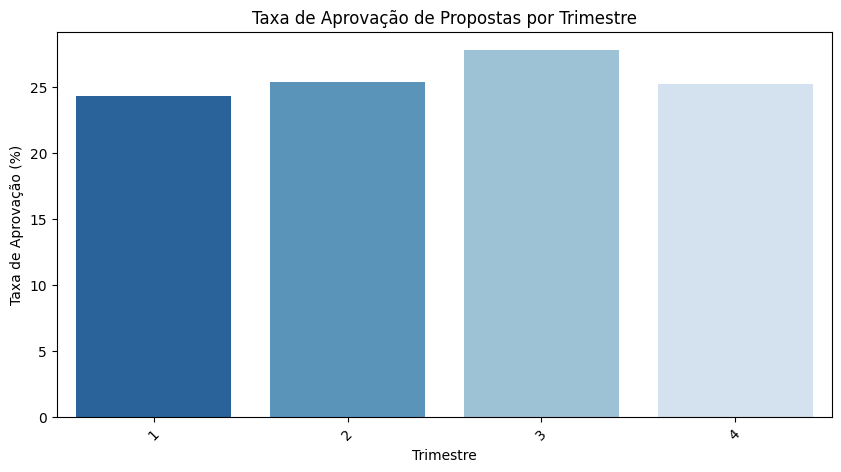

In [33]:
# Visualizar taxa de aprovação por trimestre
plt.figure(figsize=(10,5))
sns.barplot(x=df_trimestre['trimestre'].astype(str), y=df_trimestre['taxa_aprovacao'], palette="Blues_r")
plt.title("Taxa de Aprovação de Propostas por Trimestre")
plt.xlabel("Trimestre")
plt.ylabel("Taxa de Aprovação (%)")
plt.xticks(rotation=45)
plt.show()



In [34]:
#Pergunta do analista  meses que contém R no seu nome  e volume de transacoes
# A despeito de parecer uma hipotese absurda, podemos responder aos nobre colega usando de 
# referencial estatistico de correlacao, ou seja, o quanto um fator influencia em outro, no caso em especifico
# quanto o fato de um mes ter a letra R ou nao afeta no numero de negocios.
# como apontam os dados o 4 trimestre segue como o top em termos de volume de transacao, todos os meses deste trimestre
#possuem a letra R em seu nome, o que aparenta falsa relacao de causalidade.
# o primeiro trimestre tambem possue R em todos os nomes dos meses, contudo, como apontam os dados, fica no botton da analise
# Portanto, sem perder o tempo com formulas ou dados ou graficos complicados, basta informar ao colega que nao passa de uma
#coicidencia comica.



In [35]:
#Pergunta 4: André Tech solicitou  dados públicas para enriquecer a base de dados do BanVic 
# ampliar as possibilidades de análise, considerando principalmente a necessidade atual apresentada.
# em que pese o IPCA ser um bom termometro da inflacao e economia, ele reflete uma realidade menos acurada do que o INPC
# O IPCA indice de precos ao consumidor amplo, leva em conta mais itens supefluos, logo, dialoga com populacao mais abastada
# O INPC por seu turno trata de itens mais necessarios e de uso comum, ele mede mais fidedignamente os impactos da inflacao
# O IPCA , por ser mais amplo, acaba diluindo mais as implicacoes de dinamicas de preco na economia
#ja que o interesse seria eriquecer o banco de dados, melhor usar o INPC disponivel por API no site do IBGE 
# disponibilizo o arquivo das series historicas do INPC no mesmo link do projeto que esta no github

In [36]:
#vamos demonstrar alguns KPIs - Key Performance Indicators que podem ser uteis ao tomador de decisoes 
# Taxa de aprovacao de credito - o coracao do negocio-  pode indicar melhores oportunidades de vender o produto
#Volume de transacoes por agencia, possivel integrar os dados de agencias e de negocios realizados, encontrando qual
# unidade vende mais e a partir dai tentar replicar os procedimentos as demais agencias aumentando o aproveitamento
# no mesmo sentido, quais os funcionarios vendem mais, ou seja, quais profissionais podem ser os diretores ou gerentes
# no proposito de que liderem times e campanhas para melhorar os indices e treinar mais colaboradores.



In [37]:
# 1. Taxa de Aprovação de Crédito
df_propostas['aprovada'] = df_propostas['status_proposta'].apply(lambda x: 1 if x == 'Aprovada' else 0)
taxa_aprovacao = df_propostas['aprovada'].mean() * 100
print(f"Taxa de Aprovação de Crédito: {taxa_aprovacao:.2f}%")



Taxa de Aprovação de Crédito: 25.70%


In [38]:
# 2. Volume de Transações por Agência
transacoes_por_agencia = df_transacoes.groupby('num_conta').agg(
    total_transacoes=('valor_transacao', 'count'),
    volume_total=('valor_transacao', 'sum')
).reset_index()

df_contas_agencias = df_contas[['num_conta', 'cod_agencia']].merge(transacoes_por_agencia, on='num_conta', how='left')
df_agencias_transacoes = df_contas_agencias.merge(df_agencias[['cod_agencia', 'nome', 'cidade']], on='cod_agencia', how='left')
agencias_transacoes = df_agencias_transacoes.groupby(['nome', 'cidade']).agg(
    total_transacoes=('total_transacoes', 'sum'),
    volume_total=('volume_total', 'sum')
).reset_index()

print("Top 10 Agências com Maior Volume de Transações:")
print(agencias_transacoes.sort_values(by='volume_total', ascending=False).head(10))


Top 10 Agências com Maior Volume de Transações:
                     nome          cidade  total_transacoes  volume_total
1         Agência Digital       São Paulo             33167   11579143.34
4          Agência Matriz       São Paulo              8610    3549901.76
9         Agência Tatuapé       São Paulo              7156    3194382.65
0        Agência Campinas        Campinas              5500    1963250.24
6    Agência Porto Alegre    Porto Alegre              4474    1605153.92
5          Agência Osasco          Osasco              4697    1427088.95
8  Agência Rio de Janeiro  Rio de Janeiro              3779    1159050.46
2   Agência Florianópolis   Florianópolis              2133     634934.63
3         Agência Jardins       São Paulo              2109     479622.44
7          Agência Recife          Recife               374     112926.01


In [39]:
# 3. Funcionários que Mais Realizam Vendas
vendas_por_funcionario = df_propostas.groupby('cod_colaborador').agg(
    propostas_realizadas=('cod_proposta', 'count'),
    propostas_aprovadas=('aprovada', 'sum')
).reset_index()
vendas_por_funcionario['taxa_aprovacao'] = (vendas_por_funcionario['propostas_aprovadas'] / vendas_por_funcionario['propostas_realizadas']) * 100

# Mesclar com os nomes dos colaboradores e suas respectivas agências
df_vendas_funcionarios = vendas_por_funcionario.merge(df_colaboradores[['cod_colaborador', 'primeiro_nome', 'ultimo_nome']], on='cod_colaborador', how='left')
df_vendas_funcionarios = df_vendas_funcionarios.merge(df_colab_agencia[['cod_colaborador', 'cod_agencia']], on='cod_colaborador', how='left')
df_vendas_funcionarios = df_vendas_funcionarios.merge(df_agencias[['cod_agencia', 'nome']], on='cod_agencia', how='left')

# Selecionar apenas as colunas necessárias
df_vendas_funcionarios = df_vendas_funcionarios[['primeiro_nome', 'ultimo_nome', 'nome', 'taxa_aprovacao']]

print("Top 10 Funcionários com Maior Taxa de Aprovação:")
print(df_vendas_funcionarios.sort_values(by='taxa_aprovacao', ascending=False).head(10))


Top 10 Funcionários com Maior Taxa de Aprovação:
   primeiro_nome ultimo_nome                    nome  taxa_aprovacao
20       Rafaela     Correia    Agência Porto Alegre       47.058824
64       Sabrina       Silva         Agência Tatuapé       45.833333
86          Luna    Teixeira  Agência Rio de Janeiro       45.000000
9     Vitor Hugo      Novaes    Agência Porto Alegre       44.444444
22         Elisa      Fogaça          Agência Matriz       43.478261
81       Mirella       Sales          Agência Recife       41.666667
19         Alice      Aragão         Agência Digital       41.176471
13         Paulo        Dias          Agência Matriz       41.176471
23       Vitória      Vieira          Agência Matriz       40.909091
21     Davi Luiz       Sales         Agência Tatuapé       38.888889


In [40]:
###podemos ir avante com as primeiras analises - verificar quais os clientes mais ativos, 
### faixa de empréstimo mais aprovada
###qual tipo de emprestimo mais ralizado, ou seja, a media dos valores, para segmentar ofertas

In [45]:

def calcular_kpis(df_contas, df_clientes, df_propostas, df_transacoes):
    # Clientes mais ativos (quantidade de empréstimos por cliente)
    clientes_mais_ativos = df_propostas.groupby('cod_cliente').agg(
        quantidade_emprestimos=('cod_proposta', 'count')
    ).reset_index()
    clientes_mais_ativos = clientes_mais_ativos.merge(df_clientes[['cod_cliente', 'primeiro_nome', 'ultimo_nome']], on='cod_cliente', how='left')
    
    # Faixa de empréstimo mais aprovada
    df_propostas['faixa_emprestimo'] = pd.cut(df_propostas['valor_proposta'], 
                                               bins=[0, 5000, 10000, 20000, 50000, 100000, float('inf')],
                                               labels=['Até 5k', '5k-10k', '10k-20k', '20k-50k', '50k-100k', 'Acima de 100k'])
    faixa_emprestimo_aprovada = df_propostas['faixa_emprestimo'].value_counts().reset_index()
    faixa_emprestimo_aprovada.columns = ['faixa_emprestimo', 'quantidade_aprovada']
    
    # Tipo de empréstimo mais realizado e média dos valores
    tipo_emprestimo_mais_realizado = df_propostas.groupby('status_proposta').agg(
        quantidade=('cod_proposta', 'count'),
        valor_medio=('valor_proposta', 'mean')
    ).reset_index()
    
    # Clientes com maior volume de transações
    clientes_mais_transacoes = df_transacoes.groupby('num_conta').agg(
        total_transacoes=('valor_transacao', 'count'),
        volume_total=('valor_transacao', 'sum')
    ).reset_index()
    
    return clientes_mais_ativos, faixa_emprestimo_aprovada, tipo_emprestimo_mais_realizado, clientes_mais_transacoes

# Exemplo de uso (supondo que os dataframes já estejam carregados)
# clientes, faixas, tipos, transacoes = calcular_kpis(df_contas, df_clientes, df_propostas, df_transacoes)
# print(clientes.head())
# print(faixas.head())
# print(tipos.head())
# print(transacoes.head())

